In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('2020_hackmageddon_csv.csv',encoding='iso-8859-1')
data

,Date,Target,Description,Attack,Target Class,Attack Class,Country
0,02/01/2020,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,Account Hijacking,R Arts entertainment and recreation,Cyber Crime,US
1,02/01/2020,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,Account Hijacking,"O Public administration and defence, compulsor...",Cyber Crime,US
2,03/01/2020,Alomere Health,"The personal and medical information of 49,351...",Account Hijacking,Q Human health and social work activities,Cyber Crime,US
3,03/01/2020,Contra Costa County Library System,The Contra Costa County Library System is hit ...,Malware,"O Public administration and defence, compulsor...",Cyber Crime,US
4,03/01/2020,Native American Rehabilitation Association,Native American Rehabilitation Association ann...,Malware,Q Human health and social work activities,Cyber Crime,US
...,...,...,...,...,...,...,...
2327,31/12/2020,Multinational engineering company headquartere...,A multinational engineering company headquarte...,Business Email Compromise,M Professional scientific and technical activi...,Cyber Crime,IN
2328,31/12/2020,New York City Department of Education (NYC DoE),The New York City Department of Education reve...,Malware,"O Public administration and defence, compulsor...",Cyber Crime,US
2329,31/12/2020,Apex Laboratory,"Apex Laboratory discloses a ransomware attack,...",Malware,Q Human health and social work activities,Cyber Crime,US
2330,31/12/2020,Mattapan Community Health Center (MCHC),Mattapan Community Health Center (MCHC) provid...,Account hijacking,Q Human health and social work activities,Cyber Crime,US


In [41]:
#data.groupby(['Date'], as_index=False)

# Get a new df to analyse cyber attack occurences per day
df=pd.DataFrame({})

# New column for 'occurence' and refresh the index from 0
df['Occurences']=data['Date'].value_counts()
df.reset_index(level=0, inplace=True)

# Sort dates in increasing order by bringing it to index, apparently they are sorted in descending number of occurences
df['index'] =pd.to_datetime(df['index'])
df.index = df['index']
del df['index']

# Bring back desired column(sorted by dates) from the index
df.sort_index(inplace=True)
df['Date']=df.index

# Change back index to starting from 0
df.reset_index(drop=True,inplace=True)

df


#Note: 
#inplace=True : to replace contents
#when sorting index, df.sort_index(inplace=True) no need redeclare variable, df = df.sort_index() needs to;
#not all func provide inplace=True
        


#df2.index = pd.to_datetime(df.index,format = '%d/%m/%Y')
#plt.plot(df.index.strftime('%Y-%m'),df['Target']) 
# If you don't want day, just put '%Y-%m'
#dates=pd.date_range(data_timeline.iloc[0], periods=347, freq="D")
#sns.lineplot(x=Dat,y=Target,data=x, palette="tab10", linewidth=2.5)

,Occurences,Date
0,3,2020-01-02
1,2,2020-01-03
2,6,2020-01-05
3,2,2020-01-06
4,7,2020-01-07
...,...,...
342,3,2020-12-27
343,13,2020-12-28
344,7,2020-12-29
345,8,2020-12-30


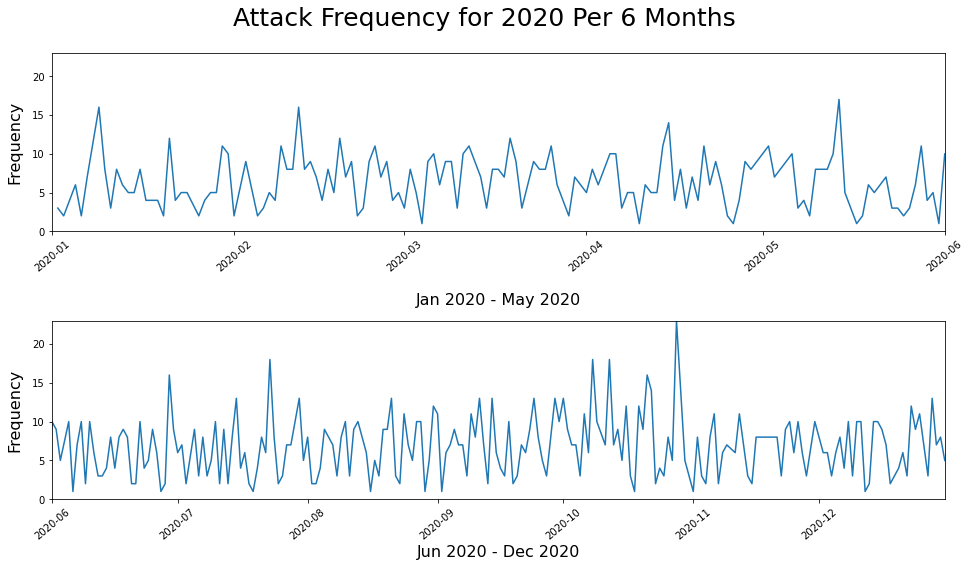

In [202]:
# Visualise overall attack frequency over 2020
plt.figure(figsize=(16,8))
plt.suptitle('Attack Frequency for 2020 Per 6 Months',fontsize=25)

plt.subplot(2,1,1)
plt.plot(df['Date'],df['Occurences'])
plt.xlim(pd.Timestamp('2020-01 00:00:00'), pd.Timestamp('2020-06 00:00:00'))
plt.ylim(0,23)
plt.xticks(rotation=40)
plt.xlabel('Jan 2020 - May 2020',fontsize=16,labelpad=20)
plt.ylabel('Frequency',fontsize=16,labelpad=10)
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,1,2)
plt.plot(df['Date'],df['Occurences'])
plt.xlim(pd.Timestamp('2020-06 00:00:00'), pd.Timestamp('2020-12-31 00:00:00'))
plt.ylim(0,23)
plt.xlabel('Jun 2020 - Dec 2020',fontsize=16)
plt.ylabel('Frequency',fontsize=16,labelpad=10)
plt.xticks(rotation=40)
plt.subplots_adjust(top=0.2,hspace=0.5)

plt.subplots_adjust(top=0.9)
#find out mean,interquartile?

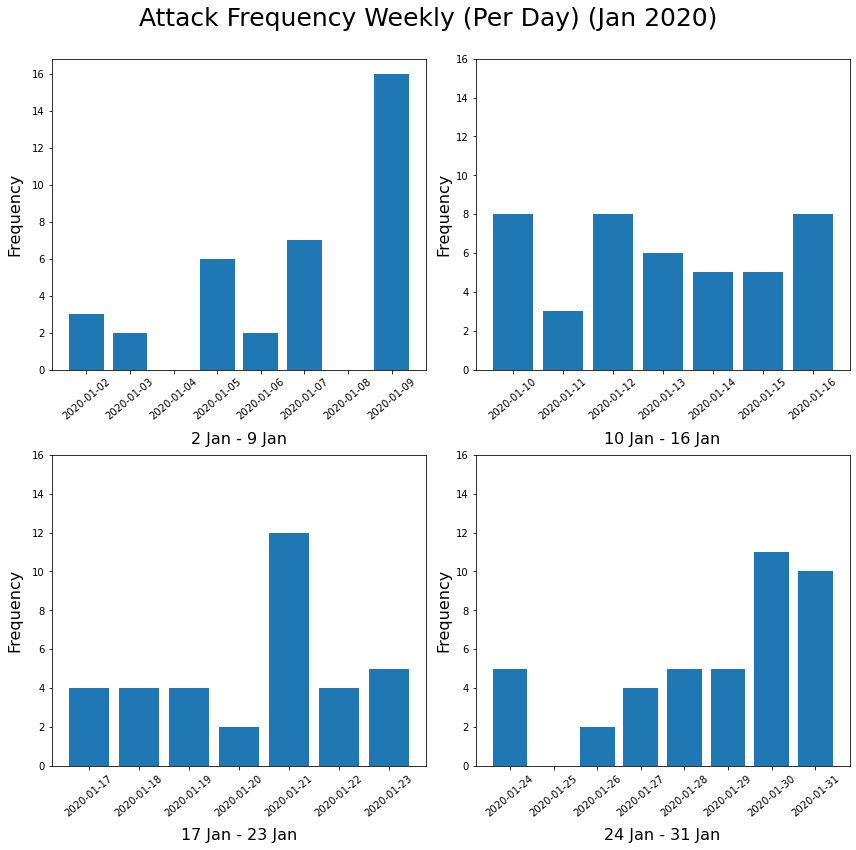

In [221]:
# Find out attack occurences weekly for Jan
df_x1_7days = df['Date'].iloc[:6]
df_y1_7days = df['Occurences'].iloc[:6]
df_x2_7days = df['Date'].iloc[6:13]
df_y2_7days = df['Occurences'].iloc[6:13]
df_x3_7days = df['Date'].iloc[13:20]
df_y3_7days = df['Occurences'].iloc[13:20]
df_x4_7days = df['Date'].iloc[20:27]
df_y4_7days = df['Occurences'].iloc[20:27]  # <<able to run by loops?
f=plt.figure(figsize=(12, 12))
f.suptitle('Attack Frequency Weekly (Per Day) (Jan 2020)',fontsize=25)

plt.subplot(2,2,1)
plt.bar( df_x1_7days, df_y1_7days)
plt.xticks(rotation=40)
plt.xlabel('2 Jan - 9 Jan',fontsize=16,labelpad=10)
plt.ylabel('Frequency',fontsize=16,labelpad=10)

plt.subplot(2,2,2)
plt.bar( df_x2_7days, df_y2_7days)
plt.ylim(0,16)
plt.xticks(rotation=40)
plt.xlabel('10 Jan - 16 Jan',fontsize=16,labelpad=10)
plt.ylabel('Frequency',fontsize=16)

plt.subplot(2,2,3)
plt.bar( df_x3_7days, df_y3_7days)
plt.ylim(0,16)
plt.xticks(rotation=40)
plt.xlabel('17 Jan - 23 Jan',fontsize=16,labelpad=10)
plt.ylabel('Frequency',fontsize=16,labelpad=10)

plt.subplot(2,2,4)
plt.bar( df_x4_7days, df_y4_7days)
plt.ylim(0,16)
plt.xticks(rotation=40)
plt.xlabel('24 Jan - 31 Jan',fontsize=16,labelpad=10)
plt.ylabel('Frequency',fontsize=16)

f.tight_layout()
f.subplots_adjust(top=0.92)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [{34}] of <class 'set'>

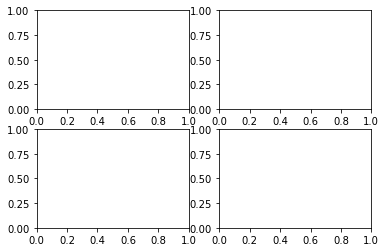

In [223]:
# Find out attack occurences weekly for Feb by trying loops
feb=20
xx=df['Date'].iloc[20:27]
yy=df['Occurences'].iloc[20:27]
fig, axes = plt.subplots(2, 2)
for row_num in range(2):
    for col_num in range(2):  #iloc in loop??? how
        ax = axes[row_num][col_num]
        ax.plot(xx, yy )
        ax.set_title(f'Plot ({row_num+1}, {col_num+1})')
fig.suptitle('Main title')
fig.tight_layout()
plt.show()